In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
computers = pd.read_csv('Course Materials/Data/Computers.csv')

In [3]:
computers.corr(numeric_only=True)

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


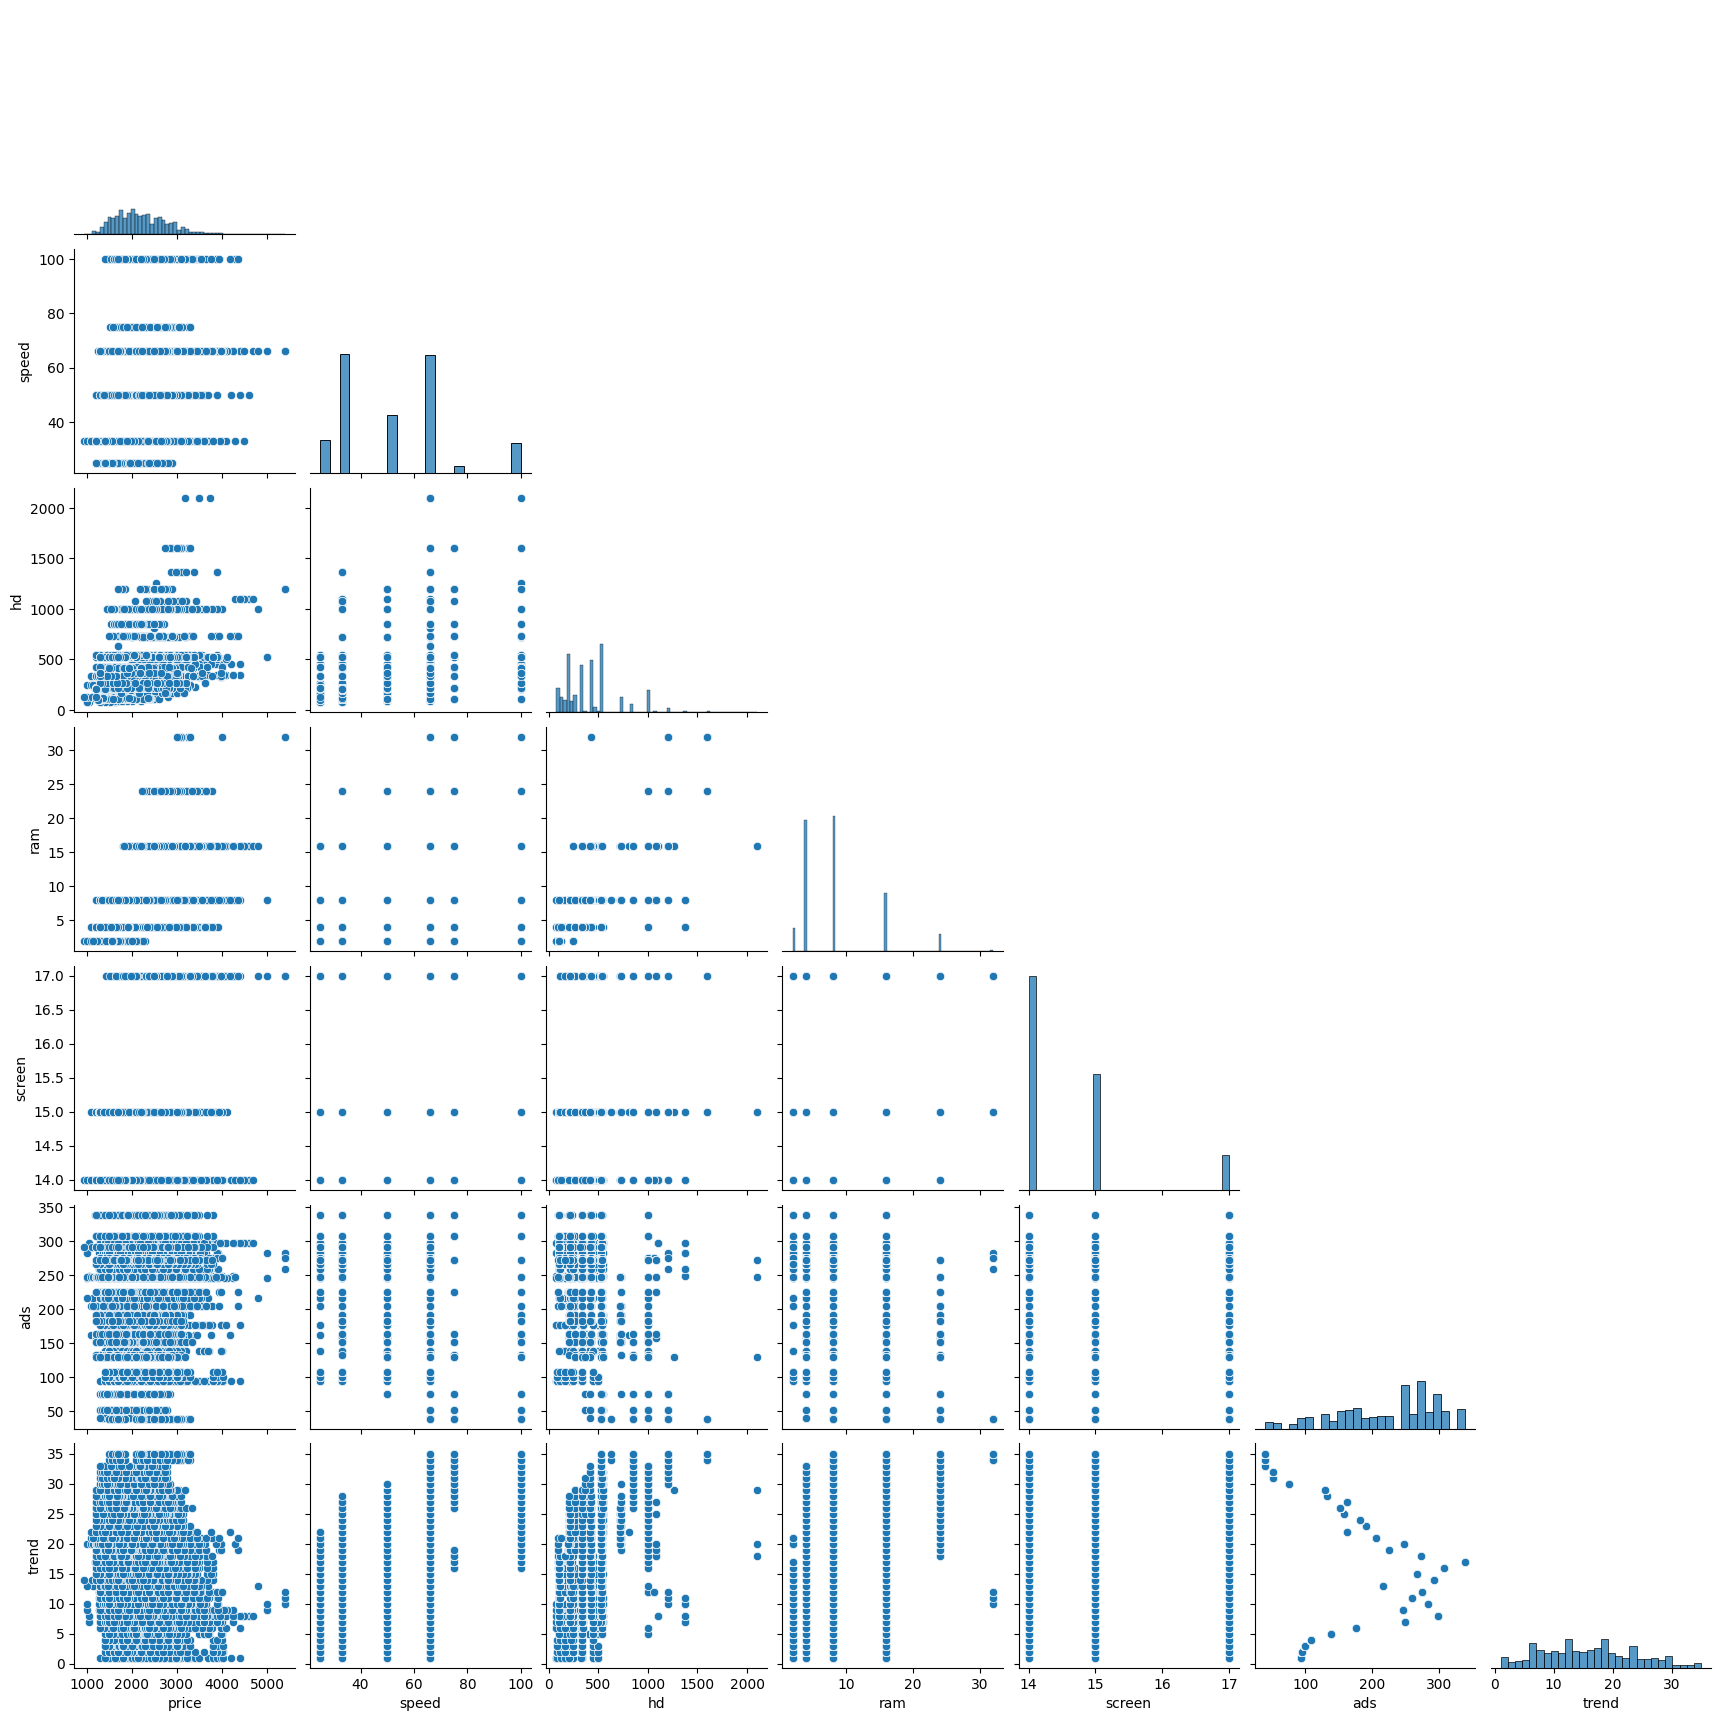

In [4]:
sns.pairplot(computers, corner=True)

<Axes: xlabel='ram'>

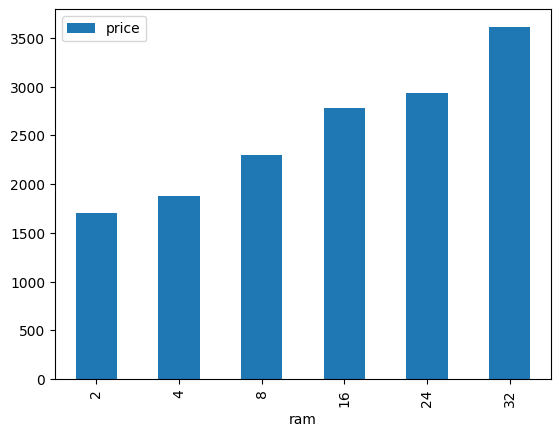

In [6]:
computers.groupby('ram').agg({
    'price': 'mean'
}).plot.bar()

In [7]:
cols = ['ram', 'speed', 'hd', 'screen', 'ads', 'trend']

X = sm.add_constant(computers[cols])
y = computers['price']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Sun, 29 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:45:28   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -246.6755     66.371     -3.717      0.000    -376.785    -116.566
ram           47.3870      1.188     39.899      0.000      45.059      49.715
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
import scipy.stats as stats

((array([-3.69316996, -3.46128945, -3.33365932, ...,  3.33365932,
          3.46128945,  3.69316996], shape=(6259,)),
  array([-929.35947012, -835.44887652, -835.01606873, ..., 1553.78485956,
         1938.70206805, 1949.90553157], shape=(6259,))),
 (np.float64(301.1246966807732),
  np.float64(1.2238581524544353e-11),
  np.float64(0.9661597216557182)))

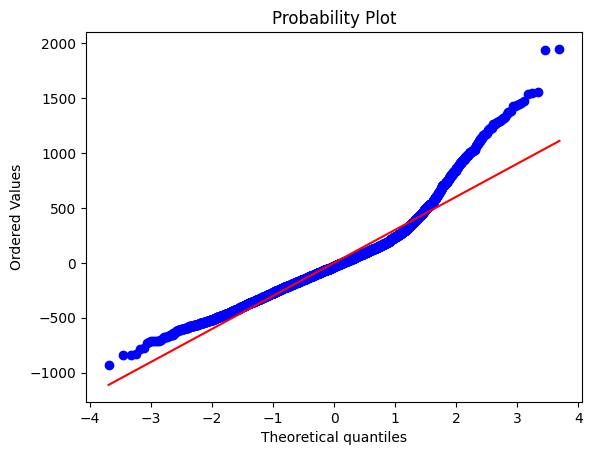

In [9]:
stats.probplot(model.resid, dist='norm', plot=plt)

In [10]:
def residual_analysis_plots(model):

    predictions = model.predict()
    residuals = model.resid

    fig, ax = plt.subplots(1, 2, sharey='all', figsize=(10,6))

    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title('Residual Plot')
    ax[0].set_xlabel('Prediction')
    ax[0].set_ylabel('Residuals')

    stats.probplot(residuals, dist='norm', plot=ax[1])
    ax[1].set_title('Normal Q-Q Plot')

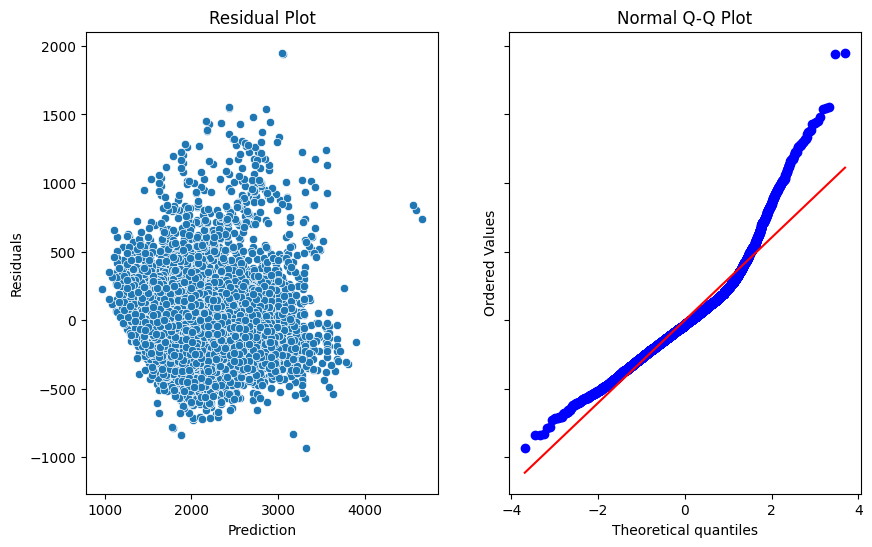

In [11]:
residual_analysis_plots(model)

In [12]:
computers = computers.assign(
    ram2 = computers['ram'] ** 2,
    hd2 = computers['hd'] ** 2,
    premium_flag = np.where(computers['premium'] == 'yes',1,0),
    multi_flag = np.where(computers['multi'] == 'yes',1,0),
    cd_flag = np.where(computers['cd'] == 'yes',1,0),
    tren2 = computers['trend'] ** 2
)

In [13]:
cols = [
    'ram',
    'ram2',
    'speed',
    'hd',
    'hd2',
    'screen',
    'ads',
    'trend',
    'tren2',
    'premium_flag',
    'cd_flag',
    'multi_flag',
]

In [14]:
X = sm.add_constant(computers[cols])
y = np.log(computers['price'])

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     2138.
Date:                Sun, 29 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:54:37   Log-Likelihood:                 4702.2
No. Observations:                6259   AIC:                            -9378.
Df Residuals:                    6246   BIC:                            -9291.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8110      0.025    270.757      0.000       6.762       6.860
ram              0.0291      0.001     21.482      0.000       0.026       0.032
ram2            -0.0004   4.95e-05     -7.461      0.000      -0.000      -0.000
speed            0.0041   7.89e-05     52.116      0.000       0.004       0.004
hd               0.0007   2.77e-05     23.436      0.000       0.001       0.001
hd2          -2.233e-07    1.9e-08    -11.779      0.000    -2.6e-07   -1.86e-07
screen           0.0511      0.002     30.688      0.000       0.048       0.054
ads           -4.84e-05   3.98e-05     -1.217      0.224      -0.000    2.96e-05
trend           -0.0133      0.001    -10.038      0.000      -0.016      -0.011
tren2           -0.0003   4.18e-05     -8.180      0.000      -0.000      -0.000
premium_flag    -0.2354      0.005    -45.692      0.000      -0.246      -0.225
cd_flag          0.0332      0.004      8.285      0.000       0.025       0.041
multi_flag       0.0485      0.005     10.236      0.000       0.039       0.058
==============================================================================
Omnibus:                      107.909   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.391
Skew:                           0.070   Prob(JB):                     5.60e-46
Kurtosis:                       3.883   Cond. No.                     7.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

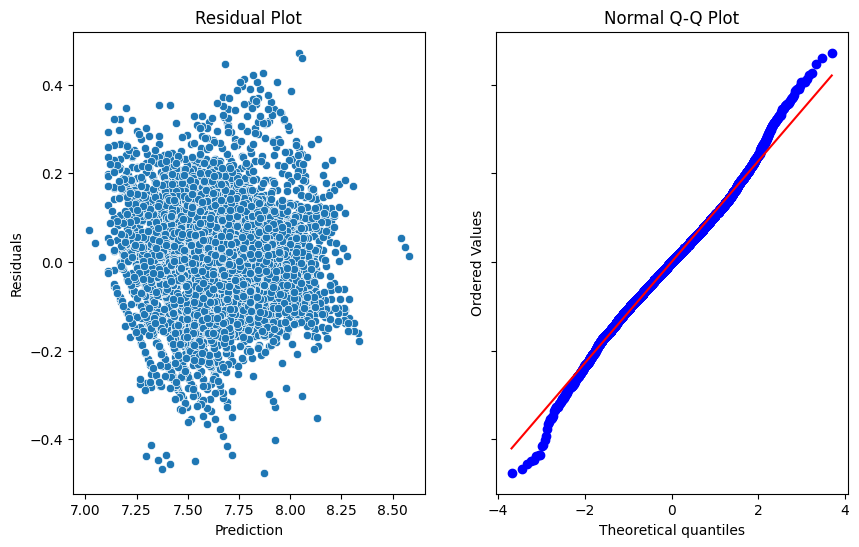

In [15]:
residual_analysis_plots(model)

In [16]:
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head()

,dfb_const,dfb_ram,dfb_ram2,dfb_speed,dfb_hd,dfb_hd2,dfb_screen,dfb_ads,dfb_trend,dfb_tren2,dfb_premium_flag,dfb_cd_flag,dfb_multi_flag,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.028932,-0.006375,0.005307,0.020054,0.023927,-0.019302,0.004238,0.006062,0.036361,-0.030932,-0.005056,-0.015473,0.003254,0.000695,-1.963549,0.002339,-0.095069,-1.963998,-0.095091
1,-0.003670,0.003820,-0.003571,0.000795,-0.000345,0.000584,0.000401,0.000754,0.004669,-0.003629,-0.000432,-0.002370,0.000451,0.000010,-0.228125,0.002504,-0.011430,-0.228108,-0.011429
2,-0.005492,0.023005,-0.018810,0.030402,-0.013072,0.013403,-0.026956,0.003424,0.052687,-0.041888,-0.002432,-0.015098,0.000222,0.000987,-2.335992,0.002347,-0.113293,-2.336826,-0.113334
3,-0.086124,-0.062784,0.053506,0.040752,0.030816,-0.021523,0.022191,0.012836,0.079445,-0.067041,0.156305,-0.026444,-0.011388,0.004269,-3.525855,0.004445,-0.235583,-3.529087,-0.235799
4,0.017676,0.017346,-0.008190,-0.010890,-0.001704,-0.006258,-0.009592,-0.000343,-0.023469,0.020531,-0.003160,-0.006904,0.004154,0.000286,1.095261,0.003093,0.061006,1.095279,0.061007


In [19]:
inf_summary_df['cooks_d'].sort_values(ascending=False).round(5)

3783    0.04043
4477    0.03228
5960    0.02566
6225    0.00872
79      0.00688
         ...   
5108    0.00000
5940    0.00000
5863    0.00000
2031    0.00000
3826    0.00000
Name: cooks_d, Length: 6259, dtype: float64

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

variables = sm.OLS(y, X).exog

pd.Series([vif(variables, i) for i in range (variables.shape[1])],
          index=X.columns
          )

const           303.308895
ram              27.951395
ram2             23.944253
speed             1.335423
hd               24.656277
hd2              18.249698
screen            1.088338
ads               4.248554
trend            52.300654
tren2            63.172539
premium_flag      1.122702
cd_flag           1.912679
multi_flag        1.291816
dtype: float64